In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
dogTweets = pd.read_csv('dog_rates_tweets.csv', parse_dates=True).set_index(keys=['id'])

In [3]:
dogTweetsText = dogTweets['text']
pattern = r'(\d+(\.\d+)?)\/10'
dogTweetsRatings = dogTweetsText.str.extract(pattern, expand=False)
dogBool = dogTweetsRatings[0].notnull()

In [4]:
dogTweets['thereisrating'] = dogBool
dogTweets['ratings'] = dogTweetsRatings[0]
dogTweets = dogTweets.reset_index()
filteredDogTweets = dogTweets[dogTweets['thereisrating'] == True]
ratingsint = pd.to_numeric(filteredDogTweets['ratings'])

In [5]:
filteredDogTweets['ratings']= ratingsint
filteredBigDogs = filteredDogTweets[filteredDogTweets['ratings'] < 20]

/Users/kai/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
filteredBigDogs['created_at'] = pd.to_datetime(filteredBigDogs['created_at'])

/Users/kai/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


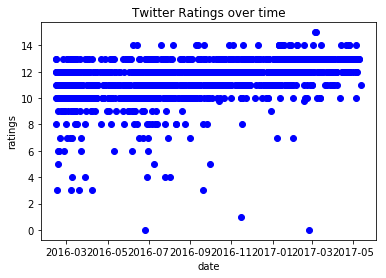

In [7]:
plt.title('Twitter Ratings over time')
plt.xlabel('date')
plt.ylabel('ratings')
plt.plot(filteredBigDogs['created_at'].values, filteredBigDogs['ratings'].values, 'bo')
plt.show()

In [8]:
def to_timestamp(datetime):
    return datetime.timestamp()
    

In [9]:
filteredBigDogs['timestamp'] = filteredBigDogs['created_at'].apply(to_timestamp)

/Users/kai/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
fit = stats.linregress(filteredBigDogs['timestamp'], filteredBigDogs['ratings'])

In [11]:
filteredBigDogs['timestamp']

0       1.494549e+09
8       1.494400e+09
9       1.494322e+09
20      1.494230e+09
30      1.494140e+09
33      1.494134e+09
35      1.494120e+09
42      1.494035e+09
49      1.494025e+09
52      1.493966e+09
54      1.493949e+09
57      1.493944e+09
58      1.493942e+09
63      1.493865e+09
77      1.493628e+09
79      1.493624e+09
81      1.493536e+09
96      1.493363e+09
108     1.493279e+09
117     1.493236e+09
119     1.493200e+09
121     1.493192e+09
128     1.493090e+09
138     1.493072e+09
143     1.493025e+09
145     1.493014e+09
152     1.492913e+09
155     1.492911e+09
159     1.492903e+09
169     1.492818e+09
            ...     
3156    1.455947e+09
3157    1.455935e+09
3161    1.455880e+09
3162    1.455877e+09
3163    1.455867e+09
3165    1.455797e+09
3166    1.455793e+09
3167    1.455791e+09
3169    1.455772e+09
3171    1.455764e+09
3172    1.455757e+09
3174    1.455710e+09
3175    1.455706e+09
3176    1.455704e+09
3177    1.455703e+09
3181    1.455683e+09
3183    1.455

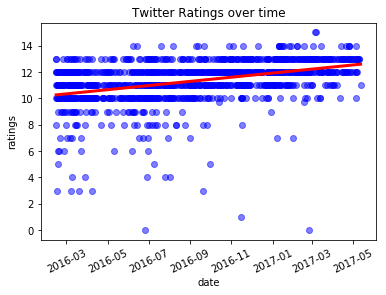

In [12]:
plt.title('Twitter Ratings over time')
plt.xlabel('date')
plt.ylabel('ratings')
plt.xticks(rotation=25)
plt.plot(filteredBigDogs['created_at'].values, filteredBigDogs['ratings'].values, 'bo', alpha=0.5)
plt.plot(filteredBigDogs['created_at'].values, filteredBigDogs['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()